# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

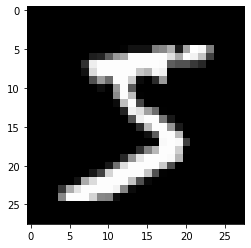

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

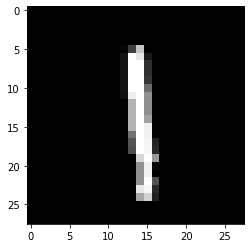

In [8]:
plt.imshow(X_train[8], cmap='gray')

## Preprocessing the image data

In [11]:
image_height, image_width = 28,28

In [12]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
X_train /= 255.0
X_test /= 255.0

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [18]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [19]:
y_train = to_categorical(y_train, 10)
print(y_train.shape)

(60000, 10)


In [20]:
y_test = to_categorical(y_test, 10)
print(y_test.shape)

(10000, 10)


## Build a model

## Compile the model

In [21]:
model = Sequential()

In [22]:
model.add(Dense(512, activation='relu', input_shape = (784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [26]:
784 * 512 + 512

401920

In [27]:
512 * 512 + 512

262656

In [31]:
512 * 10 + 10

5130

## Train the model

In [32]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1824 - accuracy: 0.9446 - val_loss: 0.0930 - val_accuracy: 0.9716
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0804 - accuracy: 0.9751 - val_loss: 0.0968 - val_accuracy: 0.9719
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0686 - val_accuracy: 0.9818
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0783 - val_accuracy: 0.9800
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0898 - val_accuracy: 0.9760
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0921 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

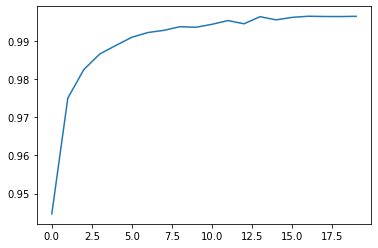

In [44]:
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

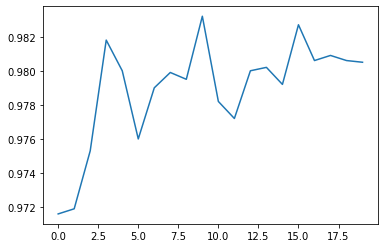

In [45]:
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

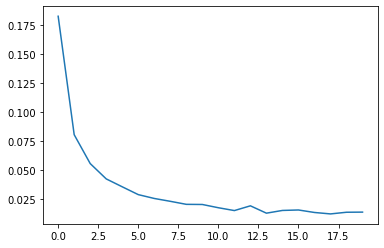

In [43]:
plt.plot(history.history['loss'])

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()